In [1]:
from pyspark.sql import SparkSession

from pyspark.sql.functions import *
from pyspark.sql.types import *

spark = SparkSession \
    .builder \
    .appName("crear_reports") \
    .enableHiveSupport() \
    .getOrCreate()

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


2023-11-23T00:53:23,271 WARN [Thread-4] org.apache.hadoop.util.NativeCodeLoader - Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
2023-11-23T00:53:23,961 WARN [Thread-4] org.apache.spark.util.Utils - Service 'SparkUI' could not bind on port 4040. Attempting port 4041.


In [ ]:
#%pip install --user matplotlib pandas

Preguntas:

- Determinar cómo están distribuidos geográficamente los usuarios indicando que países son los más populares.- 
Determinar cuáles son las actividades más populares y que exigencia física requiere cada una a través de la pulsaciones.
Para ello se crean 2 dataframes y se gráfican los resultados usando la tabla bigtable creada. 


In [7]:
df_usuarios_pais = spark.sql("""
    SELECT 
        usu_pais,
        COUNT(*)
    FROM datalake.bigtable_data_fitness
    GROUP BY 
        usu_pais
    ORDER BY 
        COUNT(*) DESC
    limit 15""")

df_usuarios_pais.show()

+--------------+--------+
|      usu_pais|count(1)|
+--------------+--------+
|         China|     155|
|     Indonesia|      90|
|        Russia|      41|
|   Philippines|      41|
|        Brazil|      41|
|        Poland|      41|
|        France|      24|
|        Sweden|      19|
| United States|      18|
|      Portugal|      18|
|          Peru|      16|
|Czech Republic|      13|
|       Ukraine|      12|
|  South Africa|      11|
|        Mexico|      10|
+--------------+--------+



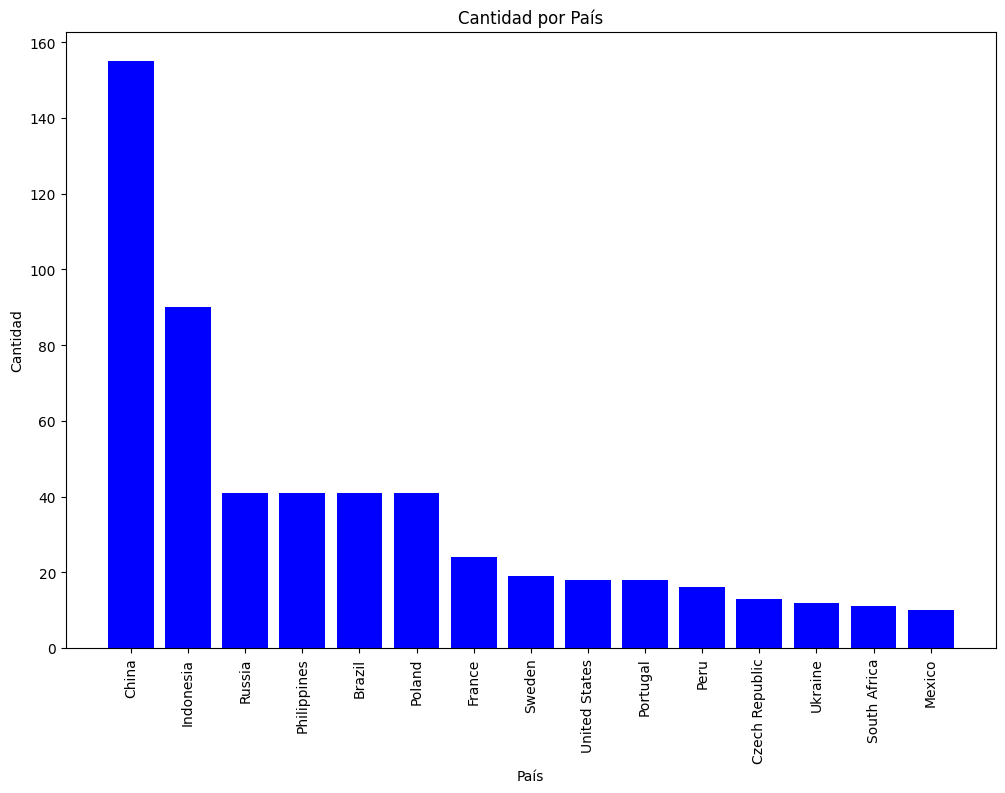

In [20]:
import matplotlib.pyplot as plt
import pandas as pd

df_pandas = df_usuarios_pais.toPandas()

df_pandas = df_pandas.sort_values(by='count(1)', ascending=False)

plt.figure(figsize=(12, 8))
plt.bar(df_pandas['usu_pais'], df_pandas['count(1)'], color='blue')

plt.title('Cantidad por País')
plt.xlabel('País')
plt.ylabel('Cantidad')
plt.xticks(rotation=90) 

plt.show()

In [10]:
df_actividades = spark.sql("""
    SELECT
        act_tipo_actividad,
        COUNT(*)
    FROM 
        datalake.bigtable_data_fitness
    GROUP BY
        act_tipo_actividad
    ORDER BY
        COUNT(*) DESC""")

df_actividades.show()

+------------------+--------+
|act_tipo_actividad|count(1)|
+------------------+--------+
|          gimnasia|      46|
|          natacion|      46|
| acrobacia en tela|      44|
|          triatlon|      43|
|              golf|      43|
|         atletismo|      43|
|             rugby|      38|
|          ciclismo|      38|
|            volley|      37|
|      pelota vasca|      36|
|            cardio|      36|
|             tenis|      36|
|             boxeo|      35|
|           maraton|      35|
|             baile|      34|
|           basquet|      32|
|            futbol|      29|
+------------------+--------+



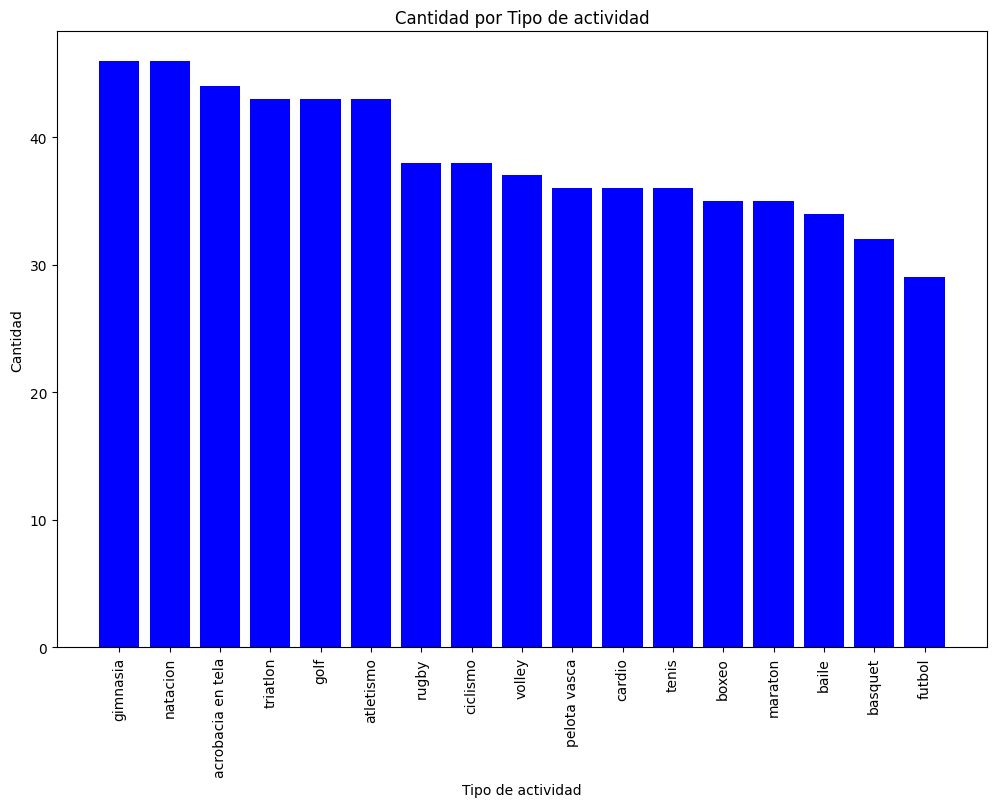

In [19]:
import matplotlib.pyplot as plt
import pandas as pd

df_pandas = df_actividades.toPandas()

df_pandas = df_pandas.sort_values(by='count(1)', ascending=False)

plt.figure(figsize=(12, 8))
plt.bar(df_pandas['act_tipo_actividad'], df_pandas['count(1)'], color='blue')

plt.title('Cantidad por Tipo de actividad')
plt.xlabel('Tipo de actividad')
plt.ylabel('Cantidad')
plt.xticks(rotation=90) 

plt.show()

In [13]:
df_pulsaciones = spark.sql("""
    SELECT
        act_tipo_actividad,
        min(act_eve_pulse_rate) as min_pulse_rate,
        max(act_eve_pulse_rate) as max_pulse_rate,
        round(avg(act_eve_pulse_rate), 0) as avg_pulse_rate
    FROM 
        datalake.bigtable_data_fitness
    GROUP BY
        act_tipo_actividad
    ORDER BY
        4 DESC""")

df_pulsaciones.show()
        

+------------------+--------------+--------------+--------------+
|act_tipo_actividad|min_pulse_rate|max_pulse_rate|avg_pulse_rate|
+------------------+--------------+--------------+--------------+
| acrobacia en tela|            41|           200|         134.0|
|          gimnasia|            41|           198|         130.0|
|            volley|            46|           195|         130.0|
|             tenis|            46|           199|         130.0|
|            futbol|            41|           199|         126.0|
|           maraton|            45|           200|         122.0|
|             boxeo|            41|           190|         121.0|
|            cardio|            41|           198|         118.0|
|          natacion|            40|           199|         117.0|
|         atletismo|            41|           198|         116.0|
|          ciclismo|            46|           197|         116.0|
|             baile|            41|           198|         114.0|
|      pel

In [15]:
df_pulsaciones_grafica = spark.sql("""
    SELECT
        act_tipo_actividad,
        act_eve_pulse_rate        
    FROM 
        datalake.bigtable_data_fitness""")

<Figure size 1200x800 with 0 Axes>

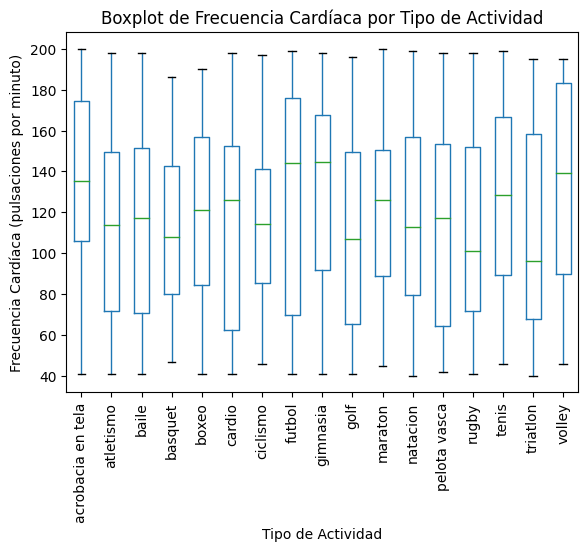

In [18]:
# Supongamos que tu DataFrame se llama 'df'

df = df_pulsaciones_grafica.toPandas()

# Crear un gráfico de boxplot
plt.figure(figsize=(12, 8))

# Crear el boxplot agrupado por 'act_tipo_actividad'
# La función boxplot de Pandas hace esto muy sencillo
df.boxplot(by='act_tipo_actividad', column=['act_eve_pulse_rate'], grid=False)

# Añadir títulos y etiquetas
plt.title('Boxplot de Frecuencia Cardíaca por Tipo de Actividad')
plt.suptitle('')  # Suprime el título automático para evitar duplicidad
plt.xlabel('Tipo de Actividad')
plt.xticks(rotation=90) 
plt.ylabel('Frecuencia Cardíaca (pulsaciones por minuto)')

# Mostrar el gráfico
plt.show()